# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Reading the Dataset

In [2]:
df=pd.read_csv("Data/autos.csv", encoding='latin1')
df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


# Cleaning the dataset

In [3]:
df.drop(columns=["dateCrawled","name","nrOfPictures","postalCode","lastSeen","dateCreated","seller","offerType","model"],inplace=True)



In [4]:
#to find the missing values in the columns
df.isna().sum()

price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dtype: int64

In [5]:
#replacing the missing values
df["vehicleType"].fillna(df["vehicleType"].mode()[0],inplace=True)
df["gearbox"].fillna(df["gearbox"].mode()[0],inplace=True)
df["fuelType"].fillna(df["fuelType"].mode()[0],inplace=True)
df["notRepairedDamage"].fillna(df["notRepairedDamage"].mode()[0],inplace=True)

In [6]:
df.isna().sum()


price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dtype: int64

# removing the duplicated values

In [7]:
df.duplicated().sum()

24211

In [8]:
df=df.drop_duplicates()


In [9]:
df.duplicated().sum()


0

# label Encoding

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347317 entries, 0 to 371527
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   price                347317 non-null  int64 
 1   abtest               347317 non-null  object
 2   vehicleType          347317 non-null  object
 3   yearOfRegistration   347317 non-null  int64 
 4   gearbox              347317 non-null  object
 5   powerPS              347317 non-null  int64 
 6   kilometer            347317 non-null  int64 
 7   monthOfRegistration  347317 non-null  int64 
 8   fuelType             347317 non-null  object
 9   brand                347317 non-null  object
 10  notRepairedDamage    347317 non-null  object
dtypes: int64(5), object(6)
memory usage: 31.8+ MB


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['abtest'] = le.fit_transform(df['abtest'])
df['vehicleType'] = le.fit_transform(df['vehicleType'])
df['gearbox'] = le.fit_transform(df['gearbox'])
df['fuelType'] = le.fit_transform(df['fuelType'])
df['brand'] = le.fit_transform(df['brand'])
df['notRepairedDamage'] = le.fit_transform(df['notRepairedDamage'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347317 entries, 0 to 371527
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   price                347317 non-null  int64
 1   abtest               347317 non-null  int32
 2   vehicleType          347317 non-null  int32
 3   yearOfRegistration   347317 non-null  int64
 4   gearbox              347317 non-null  int32
 5   powerPS              347317 non-null  int64
 6   kilometer            347317 non-null  int64
 7   monthOfRegistration  347317 non-null  int64
 8   fuelType             347317 non-null  int32
 9   brand                347317 non-null  int32
 10  notRepairedDamage    347317 non-null  int32
dtypes: int32(6), int64(5)
memory usage: 23.8 MB


# outliers

<AxesSubplot:xlabel='price'>

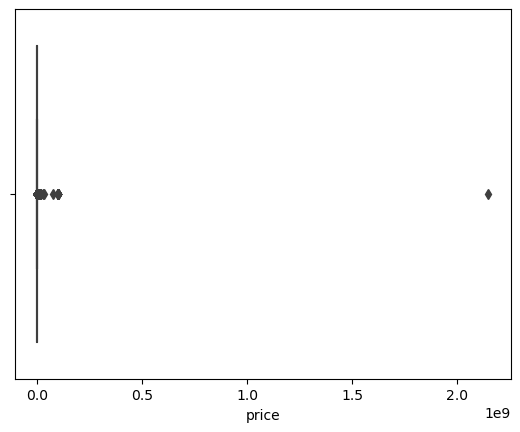

In [13]:
#checking outliers in the  price column

sns.boxplot(x=df["price"])


In [14]:
#calculating IQR

In [15]:
i=df.quantile(q=[0.75,0.25])
i

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0.75,7250.0,1.0,6.0,2008.0,1.0,150.0,150000.0,9.0,3.0,33.0,1.0
0.25,1150.0,0.0,4.0,1999.0,1.0,71.0,100000.0,3.0,1.0,9.0,1.0


In [16]:
IQR=i.iloc[0]-i.iloc[1]
IQR

price                   6100.0
abtest                     1.0
vehicleType                2.0
yearOfRegistration         9.0
gearbox                    0.0
powerPS                   79.0
kilometer              50000.0
monthOfRegistration        6.0
fuelType                   2.0
brand                     24.0
notRepairedDamage          0.0
dtype: float64

In [17]:
#calculating the outliers in the price column

a=df["price"].quantile(q=[0.75,0.25])
a

0.75    7250.0
0.25    1150.0
Name: price, dtype: float64

In [18]:
IQR=a.iloc[0]-a.iloc[1]
IQR


6100.0

In [19]:
upper_extreme=a.iloc[0]+(1.5*IQR)
lower_extreme=a.iloc[1]-(1.5*IQR)


In [20]:
upper_extreme


16400.0

In [21]:
lower_extreme

-8000.0

In [22]:
a = df[df['price'] > 20000].index
df.drop(a, inplace = True)

<AxesSubplot:xlabel='price'>

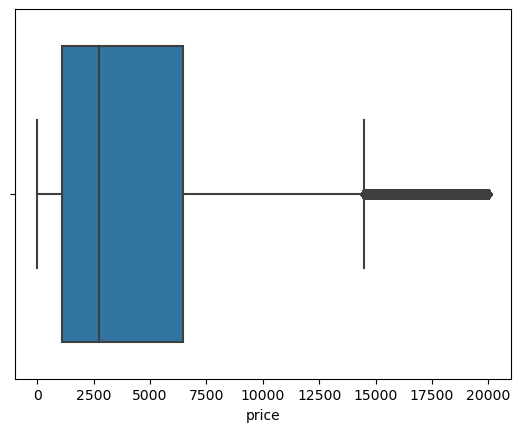

In [23]:
sns.boxplot(x=df["price"])

In [24]:
b=df["yearOfRegistration"].quantile(q=[0.75,0.25])
b

0.75    2008.0
0.25    1999.0
Name: yearOfRegistration, dtype: float64

In [25]:
IQR=b.iloc[0]-b.iloc[1]
IQR

9.0

In [26]:
upper_ext=b.iloc[0]+(1.5*IQR)
lower_ext=b.iloc[1]-(1.5*IQR)

In [27]:
upper_ext

2021.5

In [28]:
lower_ext

1985.5

In [29]:
#removing the outliers

b=df[df["yearOfRegistration"]>2017].index
df.drop(b,inplace=True)

b=df[df["yearOfRegistration"]<1980].index
df.drop(b,inplace=True)


<AxesSubplot:xlabel='yearOfRegistration'>

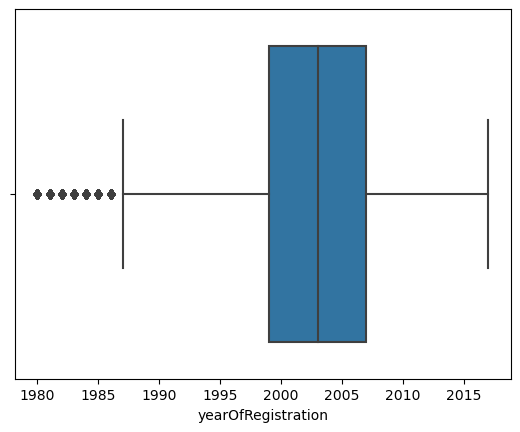

In [30]:
sns.boxplot(x=df["yearOfRegistration"])

<AxesSubplot:xlabel='powerPS'>

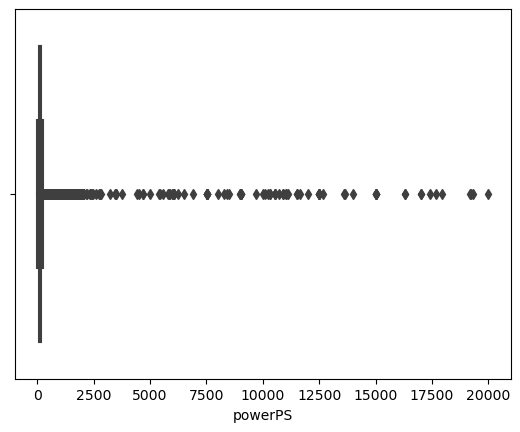

In [31]:
sns.boxplot(x=df["powerPS"])

In [32]:
c=df["powerPS"].quantile(q=[0.75,0.25])

In [33]:
IQR=c.iloc[0]-c.iloc[1]
IQR

74.0

In [34]:
upper_ext=c.iloc[0]+(1.5*IQR)
lower_ext=c.iloc[1]-(1.5*IQR)

In [35]:
upper_ext

254.0

In [36]:
lower_ext

-42.0

In [37]:
c=df[df["powerPS"]>300].index
df.drop(c,inplace=True)

c=df[df["powerPS"]<30].index
df.drop(c,inplace=True)

<AxesSubplot:xlabel='powerPS'>

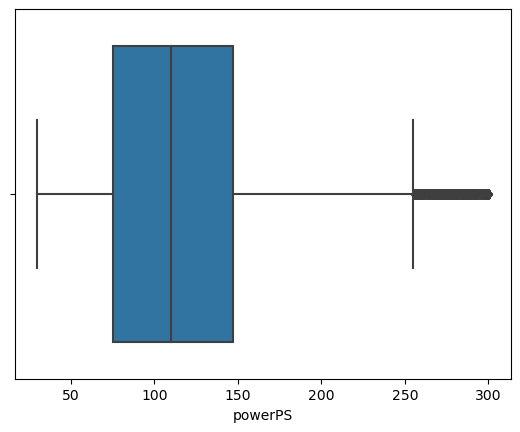

In [38]:
sns.boxplot(x=df["powerPS"])

# descriptive stastics

In [39]:
df.nunique()

price                  3576
abtest                    2
vehicleType               8
yearOfRegistration       38
gearbox                   2
powerPS                 269
kilometer                13
monthOfRegistration      13
fuelType                  7
brand                    40
notRepairedDamage         2
dtype: int64

In [40]:
df.describe()

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
count,285423.000000,285423.000000,285423.000000,285423.000000,285423.000000,285423.000000,285423.000000,285423.000000,285423.000000,285423.000000,285423.000000
mean,4624.353559,0.517124,4.504917,2003.351482,0.810226,118.350897,128767.338301,5.937465,1.665854,20.754666,0.896399
std,4529.805305,0.499708,1.673022,6.284378,0.392123,48.447493,36493.899565,3.613399,1.058651,13.354361,0.304742
min,0.000000,0.000000,0.000000,1980.000000,0.000000,30.000000,5000.000000,0.000000,0.000000,0.000000,0.000000
25%,1200.000000,0.000000,4.000000,1999.000000,1.000000,75.000000,125000.000000,3.000000,1.000000,9.000000,1.000000
50%,2990.000000,1.000000,5.000000,2003.000000,1.000000,110.000000,150000.000000,6.000000,1.000000,24.000000,1.000000
75%,6700.000000,1.000000,6.000000,2008.000000,1.000000,147.000000,150000.000000,9.000000,3.000000,34.000000,1.000000
max,20000.000000,1.000000,7.000000,2017.000000,1.000000,300.000000,150000.000000,12.000000,6.000000,39.000000,1.000000


In [41]:
df.skew()

price                  1.366474
abtest                -0.068535
vehicleType           -0.853023
yearOfRegistration    -0.074154
gearbox               -1.582297
powerPS                0.823294
kilometer             -1.688138
monthOfRegistration    0.064268
fuelType               1.477613
brand                 -0.152801
notRepairedDamage     -2.601557
dtype: float64

In [42]:
df.kurtosis()

price                  1.214423
abtest                -1.995317
vehicleType           -0.155000
yearOfRegistration     0.179966
gearbox                0.503667
powerPS                0.528249
kilometer              1.808358
monthOfRegistration   -1.116637
fuelType               2.180277
brand                 -1.324927
notRepairedDamage      4.768131
dtype: float64

In [43]:
#splitting the data into x and y

x=df.drop(columns="price")
y=df["price"]

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

<AxesSubplot:xlabel='yearOfRegistration'>

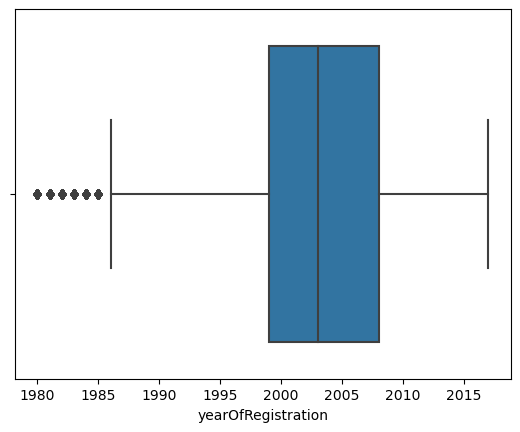

In [45]:
sns.boxplot(x=df["yearOfRegistration"])

In [46]:
# Linear Regression

In [47]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [48]:
# Lasso Regression

In [49]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01, normalize=True)
lasso.fit(x_train, y_train)

Lasso(alpha=0.01, normalize=True)

In [50]:
# Ridge Regression

In [51]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.01, normalize=True)
ridge.fit(x_train, y_train)

Ridge(alpha=0.01, normalize=True)

In [52]:
# Decision Tree

In [53]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT.fit(x_train, y_train)

DecisionTreeRegressor()

In [54]:
# KNN

In [55]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [56]:
# Random Forest

In [57]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(x_train, y_train)

RandomForestRegressor()

# Checking the Metrics of the models

In [58]:
# Linear Regression
lr.score(x_test, y_test)

0.5794527476293614

In [59]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,lr.predict(x_test)))

2926.424654896681

In [60]:
# Lasso Regression
lasso.score(x_test, y_test)

0.5795001381462063

In [61]:
np.sqrt(mean_squared_error(y_test,lasso.predict(x_test)))

2926.2597641699435

In [62]:
# Linear Regression
lr.score(x_test, y_test)# Ridge Regression
ridge.score(x_test, y_test)

0.5794718461011592

In [63]:
np.sqrt(mean_squared_error(y_test,ridge.predict(x_test)))

2926.358204726123

In [64]:
# K Nearest Neighbour
knn.score(x_test, y_test)

0.8067310400816672

In [65]:
np.sqrt(mean_squared_error(y_test,knn.predict(x_test)))

1983.8599127375612

In [66]:
# Decision Tree
DT.score(x_test, y_test)

0.7509675534712763

In [67]:
np.sqrt(mean_squared_error(y_test,DT.predict(x_test)))

2251.945701577709

In [68]:
# Random Forest
RF.score(x_test, y_test)

0.8512293757383766

In [69]:
np.sqrt(mean_squared_error(y_test,RF.predict(x_test)))

1740.558160673979

# Saving the Model

In [71]:
import pickle
pickle.dump(RF, open('Car Resale Value Prediction.pkl', 'wb'))